In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!cp /content/drive/'My Drive'/'Colab Notebooks'/StanceDataset.zip .
!unzip -q -o StanceDataset.zip -d data
!rm StanceDataset.zip
#!unzip -uq "/content/drive/My Drive/Colab Notebooks/StanceDataset.zip" -d "/content/drive/My Drive/Colab Notebooks/data"

In [2]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import numpy as np
import pandas as pd

import tensorflow_datasets as tfds
import pathlib
import shutil
import tempfile

from  IPython import display
from matplotlib import pyplot as plt

In [39]:
stance_df = pd.read_csv("../content/drive/My Drive/Colab Notebooks/StanceDataset/train.csv", index_col = None, header = 0, 
                        engine = 'python')
stance_df.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos


In [43]:
print("Stance dataset contains", stance_df.shape[0], 'rows with', stance_df.shape[1], 'variables.')

Stance dataset contains 2914 rows with 5 variables.


In [44]:
# convert all the data to lowercase letters
stance_df = stance_df.applymap(lambda x: x.upper() if type(x) is str else x)

# remove any extra whitespace from the data
stance_df = stance_df.applymap(lambda x: x.strip() if type(x) is str else x)

#stance_df.head()

In [45]:
stance_df['Stance'] = stance_df['Stance'].replace("NONE", "NEITHER")

In [46]:
#stance_df['Target'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Imbalanced data -- before sampling')

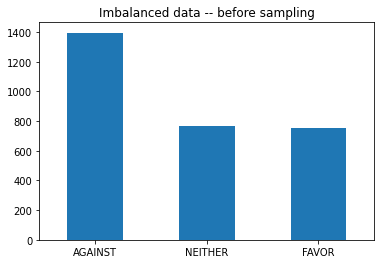

In [66]:
stance_df['Stance'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Imbalanced data -- before sampling")

In [49]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
oversample = RandomOverSampler(sampling_strategy = 'all')
X_over, y_over = oversample.fit_resample(stance_df[['Tweet', 'Target']], stance_df['Stance'])
print(Counter(y_over))

Counter({'AGAINST': 1395, 'NEITHER': 766, 'FAVOR': 753})
Counter({'AGAINST': 1395, 'FAVOR': 1395, 'NEITHER': 1395})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Balanced data -- after oversampling')

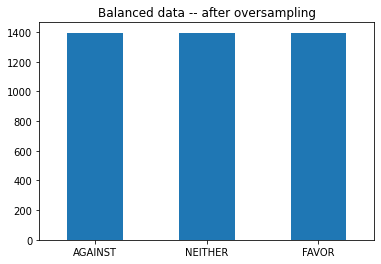

In [65]:
df = pd.DataFrame(X_over, columns = ['Tweet', 'Target'])
df['Stance'] = y_over

df['Stance'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Balanced data -- after oversampling")

In [53]:
print("After performing the Random Over sampling, the dataset contains", df.shape[0], 'rows with', df.shape[1], 'variables.')

After performing the Random Over sampling, the dataset contains 4185 rows with 3 variables.


In [67]:
df.head()

,Tweet,Target,Stance
0,"@TEDCRUZ AND, #HANDOVERTHESERVER SHE WIPED CLE...",HILLARY CLINTON,AGAINST
1,HILLARY IS OUR BEST CHOICE IF WE TRULY WANT TO...,HILLARY CLINTON,FAVOR
2,@THEVIEW I THINK OUR COUNTRY IS READY FOR A FE...,HILLARY CLINTON,AGAINST
3,I JUST GAVE AN UNHEALTHY AMOUNT OF MY HARD-EAR...,HILLARY CLINTON,AGAINST
4,@PORTIAABOULGER THANK YOU FOR ADDING ME TO YOU...,HILLARY CLINTON,NEITHER
